<a href="https://colab.research.google.com/github/zainamri/Kelompok-3-/blob/main/projek_pembelajaran_mesin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Akses dataset
file_path = ('/content/drive/MyDrive/awikwok/heart_failure_clinical_records_dataset.csv')
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Menampilkan informasi awal data
def initial_data_info(data):
    print("Initial Data Info:")
    data.info()
    print("\nMissing Values:")
    print(data.isnull().sum())
    print("\nDuplicate Rows:")
    print(data.duplicated().sum())
initial_data_info(data)



Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB

In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


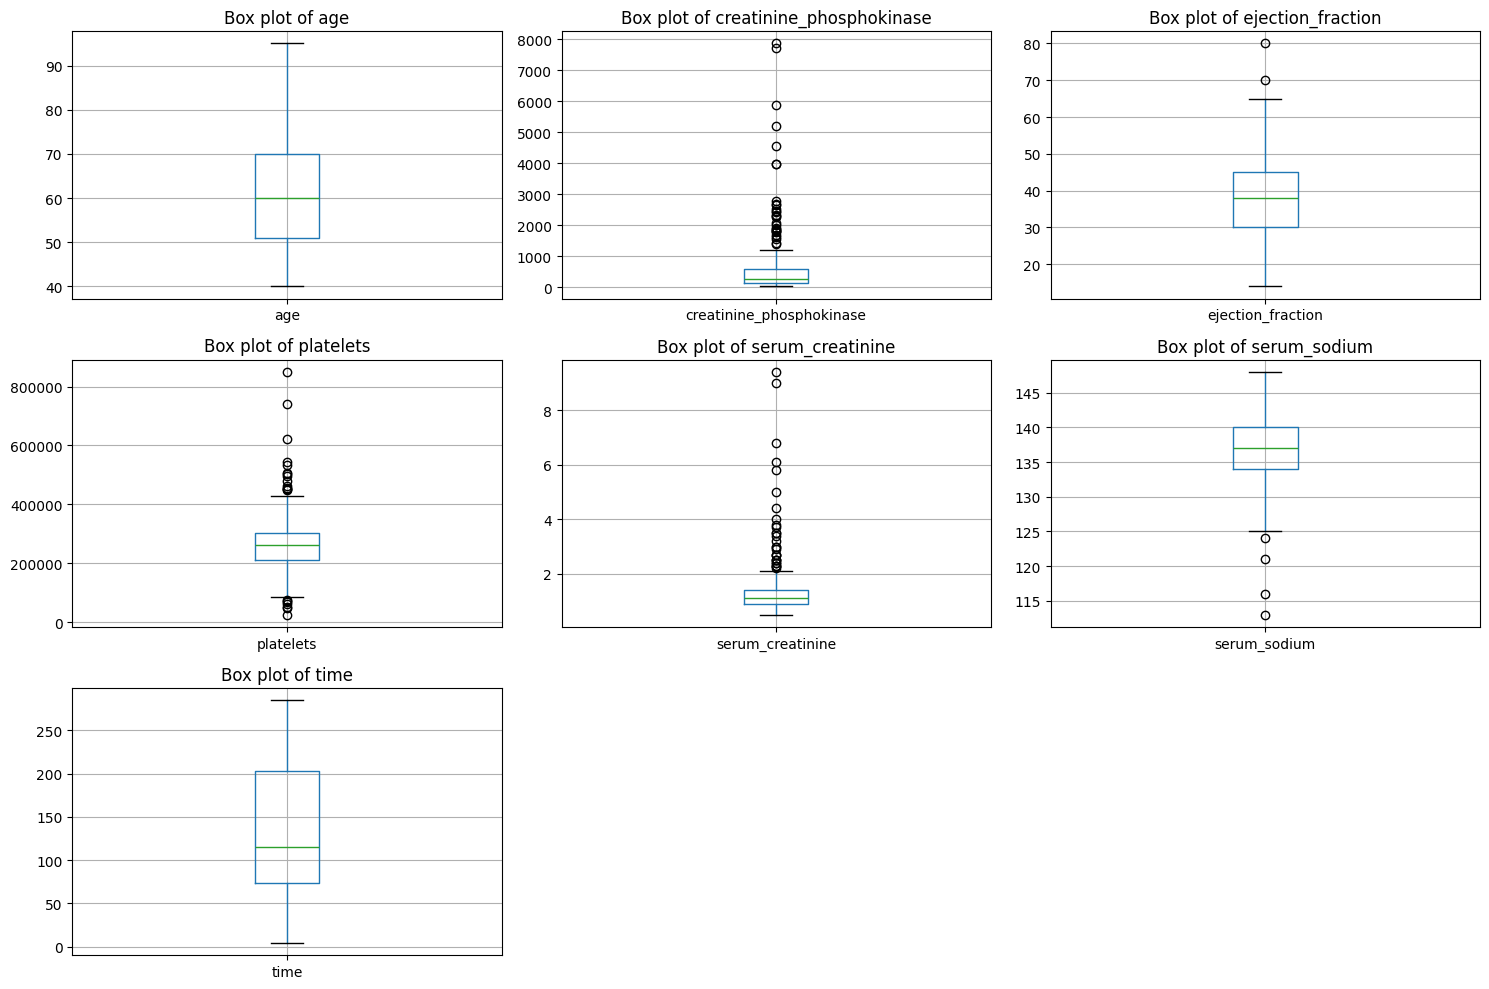

In [ ]:
import matplotlib.pyplot as plt

# List of numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create a box plot for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    data.boxplot(column=feature)
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()


1. Pra-pemrosesan Data

  Normalisasi atau Standarisasi Data: Karena fitur-fitur dalam dataset memiliki skala yang berbeda, penting untuk menormalkan atau menstandarisasi data sebelum melakukan clustering.

In [ ]:
     from sklearn.preprocessing import StandardScaler

     scaler = StandardScaler()
     scaled_data = scaler.fit_transform(data.drop(columns=['DEATH_EVENT']))  # Menghapus kolom target


2. Menentukan Jumlah Cluster

  Metode Elbow: Gunakan metode elbow untuk menentukan jumlah cluster yang optimal.


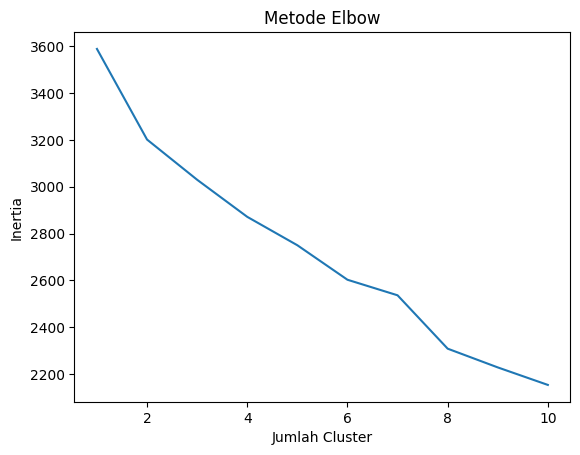

In [ ]:
     from sklearn.cluster import KMeans
     import matplotlib.pyplot as plt

     inertia = []
     for k in range(1, 11):
         kmeans = KMeans(n_clusters=k, random_state=42)
         kmeans.fit(scaled_data)
         inertia.append(kmeans.inertia_)

     plt.plot(range(1, 11), inertia)
     plt.xlabel('Jumlah Cluster')
     plt.ylabel('Inertia')
     plt.title('Metode Elbow')
     plt.show()

3. Melakukan Clustering

  Setelah menentukan jumlah cluster (misalnya 3), lakukan clustering menggunakan KMeans.


In [ ]:
     kmeans = KMeans(n_clusters=3, random_state=42)
     data['Cluster'] = kmeans.fit_predict(scaled_data)

4. Analisis Hasil Clustering

  Visualisasi Cluster: Anda dapat memvisualisasikan hasil clustering untuk memahami distribusi pasien dalam setiap cluster.


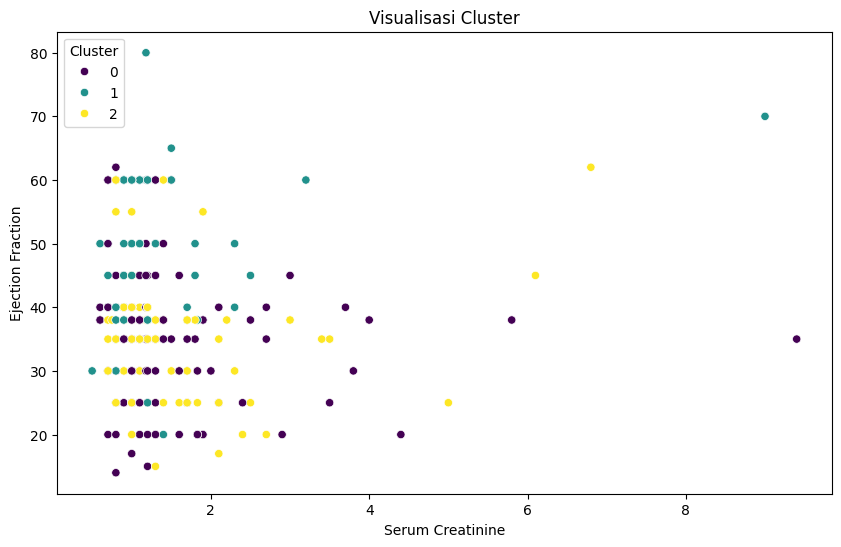

In [ ]:
     import seaborn as sns

     plt.figure(figsize=(10, 6))
     sns.scatterplot(x=data['serum_creatinine'], y=data['ejection_fraction'], hue=data['Cluster'], palette='viridis')
     plt.title('Visualisasi Cluster')
     plt.xlabel('Serum Creatinine')
     plt.ylabel('Ejection Fraction')
     plt.show()

5. Menentukan Risiko

  Menentukan Kriteria Risiko: Berdasarkan analisis data, tentukan kriteria untuk setiap cluster. Misalnya:
      1.Cluster 0: Risiko rendah (misalnya, serum creatinine rendah dan ejection fraction tinggi)
      2.Cluster 1: Risiko sedang
      3.Cluster 2: Risiko tinggi (misalnya, serum creatinine tinggi dan ejection fraction rendah)


6. Evaluasi Model

  Silhouette Score: Hitung silhouette score untuk mengevaluasi kualitas clustering.


In [ ]:
     from sklearn.metrics import silhouette_score

     score = silhouette_score(scaled_data, data['Cluster'])
     print(f'Silhouette Score: {score}')

Silhouette Score: 0.09240740758133979


7. Interpretasi Hasil

  Analisis setiap cluster untuk memahami karakteristik pasien dalam setiap kelompok risiko. Anda dapat menggunakan statistik deskriptif untuk setiap cluster.


In [ ]:
     cluster_summary = data.groupby('Cluster').mean()
     print(cluster_summary)

               age   anaemia  creatinine_phosphokinase  diabetes  \
Cluster                                                            
0        61.406250  0.335938                644.429688  0.210938   
1        63.752941  0.623529                389.800000  0.164706   
2        57.096907  0.383721                678.488372  0.976744   

         ejection_fraction  high_blood_pressure      platelets  \
Cluster                                                          
0                34.773438             0.273438  250020.737422   
1                45.376471             0.529412  264876.543647   
2                35.802326             0.290698  281708.025000   

         serum_creatinine  serum_sodium       sex   smoking        time  \
Cluster                                                                   
0                1.434375    136.203125  1.000000  0.703125  127.148438   
1                1.228824    138.305882  0.329412  0.035294  121.917647   
2                1.496744   